# Late delivery risk

## Load data

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
MainTable = pd.read_csv("/Users/ghostpc/Documents/GitHub/DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS/CleanedData.csv", encoding='ISO-8859-1')

In [118]:
MainTable.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Name', 'Product Price',
       'Product Status', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

<AxesSubplot:xlabel='Delivery Status'>

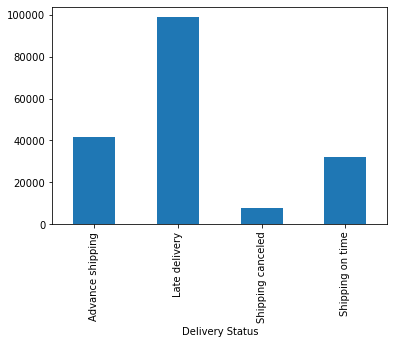

In [119]:
MainTable.groupby('Delivery Status').size().plot.bar()

In [5]:
MainTable.groupby('Delivery Status').size()

Delivery Status
Advance shipping     41592
Late delivery        98977
Shipping canceled     7754
Shipping on time     32196
dtype: int64

In [6]:
MainTable.count().head(1)

Type    180519
dtype: int64

<b> Around 55% of the total order are late for delivery </b>

In [7]:
98977/180519

0.5482913155955883

In [8]:
MainTable.nunique()

Type                                 4
Days for shipping (real)             7
Days for shipment (scheduled)        4
Benefit per order                14957
Sales per customer                2831
Delivery Status                      4
Late_delivery_risk                   2
Category Name                       50
Customer City                      563
Customer Country                     2
Customer Segment                     3
Customer State                      46
Department Name                     11
Market                               5
Order City                        3597
Order Country                      164
order date (DateOrders)          65752
Order Item Discount                927
Order Item Discount Rate            18
Order Item Product Price            69
Order Item Profit Ratio             84
Order Item Quantity                  5
Sales                              190
Order Item Total                  2831
Order Profit Per Order           14957
Order Region             

## Rows with Late deliveries

In [120]:
Late_Deliveries_Table = MainTable[MainTable['Delivery Status']=='Late delivery']
Late_Deliveries_Table.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
1,TRANSFER,5,4,-79.700005,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,...,311.359985,-79.700005,South Asia,RajastÃ¡n,PENDING,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,...,288.420013,95.180000,Eastern Asia,Guangdong,COMPLETE,Smart watch,327.75,0,1/15/2018 10:42,First Class
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,Sporting Goods,Miami,EE. UU.,...,285.140015,68.430000,Eastern Asia,Guangdong,PROCESSING,Smart watch,327.75,0,1/15/2018 10:21,First Class
8,CASH,3,2,133.720001,278.589996,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,...,278.589996,133.720001,Eastern Asia,Guangdong,CLOSED,Smart watch,327.75,0,1/16/2018 10:00,Second Class
9,CASH,2,1,132.149994,275.309998,Late delivery,1,Sporting Goods,San Ramon,EE. UU.,...,275.309998,132.149994,Eastern Asia,Guangdong,CLOSED,Smart watch,327.75,0,1/15/2018 9:39,First Class


In [121]:
catagorical_col = Late_Deliveries_Table.select_dtypes(exclude='number')
catagorical_col.head(5)

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,South Asia,RajastÃ¡n,PENDING,Smart watch,1/18/2018 12:27,Standard Class
6,DEBIT,Late delivery,Sporting Goods,Caguas,Puerto Rico,Home Office,PR,Fitness,Pacific Asia,Guangzhou,China,1/13/2018 10:42,Eastern Asia,Guangdong,COMPLETE,Smart watch,1/15/2018 10:42,First Class
7,TRANSFER,Late delivery,Sporting Goods,Miami,EE. UU.,Corporate,FL,Fitness,Pacific Asia,Guangzhou,China,1/13/2018 10:21,Eastern Asia,Guangdong,PROCESSING,Smart watch,1/15/2018 10:21,First Class
8,CASH,Late delivery,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Guangzhou,China,1/13/2018 10:00,Eastern Asia,Guangdong,CLOSED,Smart watch,1/16/2018 10:00,Second Class
9,CASH,Late delivery,Sporting Goods,San Ramon,EE. UU.,Corporate,CA,Fitness,Pacific Asia,Guangzhou,China,1/13/2018 9:39,Eastern Asia,Guangdong,CLOSED,Smart watch,1/15/2018 9:39,First Class


In [122]:
catagorical_col.count()

Type                          98977
Delivery Status               98977
Category Name                 98977
Customer City                 98977
Customer Country              98977
Customer Segment              98977
Customer State                98977
Department Name               98977
Market                        98977
Order City                    98977
Order Country                 98977
order date (DateOrders)       98977
Order Region                  98977
Order State                   98977
Order Status                  98977
Product Name                  98977
shipping date (DateOrders)    98977
Shipping Mode                 98977
dtype: int64

## Txn Type

In [124]:
# Txn type for late deliveries.
dataType= {'TypeLatecount':Late_Deliveries_Table.groupby('Type').size(),
       'TypeLateMaincount':MainTable.groupby('Type').size(),
      'Percentages':Late_Deliveries_Table.groupby('Type').size()*100/MainTable.groupby('Type').size()}

In [125]:
TypeLatecountPercetage=pd.DataFrame(dataType)
TL1=TypeLatecountPercetage.nlargest(10,'TypeLatecount').sort_values('Percentages',ascending=False)
TL1

,TypeLatecount,TypeLateMaincount,Percentages
Type,,,
PAYMENT,24004,41725,57.529059
DEBIT,39649,69295,57.217692
CASH,11109,19616,56.632341
TRANSFER,24215,49883,48.543592


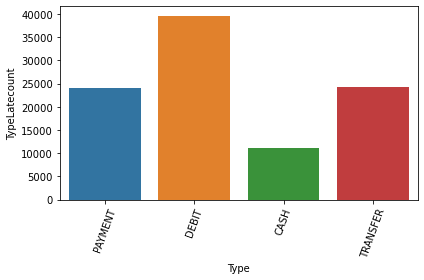

In [126]:
sns.barplot(x = TL1.index, y = TL1.TypeLatecount)
plt.xticks(rotation=70)
plt.tight_layout()

In [127]:
#pie chart
dataType1= {'TypeLatecount':Late_Deliveries_Table.groupby('Type').size(),
      'Percentages':(Late_Deliveries_Table.groupby('Type').size()*100)/98977}

In [128]:
TypeLatecountPercetage=pd.DataFrame(dataType1)
TL1=TypeLatecountPercetage.sort_values('Percentages',ascending=False)
TL1

,TypeLatecount,Percentages
Type,,
DEBIT,39649,40.058802
TRANSFER,24215,24.465280
PAYMENT,24004,24.252099
CASH,11109,11.223820


([<matplotlib.patches.Wedge at 0x7fb54bc2d610>,
 [Text(0.3379855660937831, 1.0467883057773741, 'DEBIT'),
  Text(-1.0886187711888495, -0.15782639517925873, 'TRANSFER'),
  Text(0.1138445255202703, -1.0940929686315806, 'PAYMENT'),
  Text(1.0323232242141889, -0.37987992938298476, 'CASH')],
 [Text(0.18435576332388168, 0.5709754395149312, '40%'),
  Text(-0.5937920570120997, -0.08608712464323202, '24%'),
  Text(0.06209701392014742, -0.596777982889953, '24%'),
  Text(0.5630853950259211, -0.20720723420890075, '11%')])

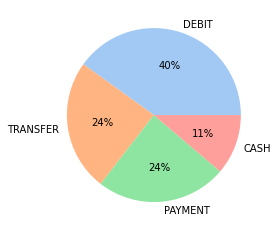

In [129]:
labels = ['DEBIT', 'TRANSFER', 'PAYMENT', 'CASH']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.pie(TL1.TypeLatecount, labels = labels, colors = colors, autopct='%.0f%%')


In [18]:
# payment = Credit Cards
# transfer = internet banking
# debit = debit card
# Cash = Cash

<b>Debit payment has maximum of late deliveries</b>

## Category Name

In [130]:
# Txn type for late deliveries.
dataCategoryName= {'CategoryNameLatecount':Late_Deliveries_Table.groupby('Category Name').size(),
       'CategoryNameLateMaincount':MainTable.groupby('Category Name').size(),
      'Percentages':Late_Deliveries_Table.groupby('Category Name').size()*100/MainTable.groupby('Category Name').size()}

In [131]:
CategoryNameLatecountPercetage=pd.DataFrame(dataCategoryName)
CN1=CategoryNameLatecountPercetage.nlargest(10,'CategoryNameLatecount').sort_values('Percentages',ascending=False)
CN1

,CategoryNameLatecount,CategoryNameLateMaincount,Percentages
Category Name,,,
Electronics,1770,3156,56.083650
Shop By Sport,6058,10984,55.152950
Cleats,13496,24551,54.971284
Fishing,9516,17325,54.926407
Water Sports,8517,15540,54.806950
Indoor/Outdoor Games,10565,19298,54.746606
Women's Apparel,11476,21035,54.556691
Camping & Hiking,7487,13729,54.534198
Cardio Equipment,6805,12487,54.496677


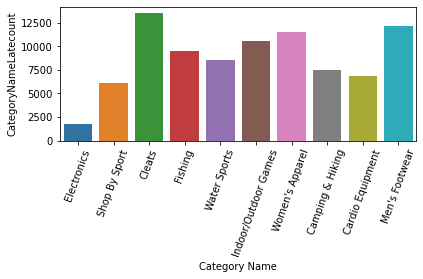

In [132]:
sns.barplot(x = CN1.index, y = CN1.CategoryNameLatecount)
plt.xticks(rotation=70)
plt.tight_layout()

## Customer City

In [133]:
# Txn type for late deliveries.
dataCustomerCity= {'CustomerCityLatecount':Late_Deliveries_Table.groupby('Customer City').size(),
       'CustomerCityLateMaincount':MainTable.groupby('Customer City').size(),
      'Percentages':Late_Deliveries_Table.groupby('Customer City').size()*100/MainTable.groupby('Customer City').size()}

In [134]:
CustomerCityLatecountPercetage=pd.DataFrame(dataCustomerCity)
CC1=CustomerCityLatecountPercetage.nlargest(10,'CustomerCityLatecount').sort_values('Percentages',ascending=False)
CC1

,CustomerCityLatecount,CustomerCityLateMaincount,Percentages
Customer City,,,
Chicago,2198,3885,56.576577
Philadelphia,871,1577,55.231452
New York,1003,1816,55.231278
Bronx,824,1500,54.933333
Caguas,36550,66770,54.740153
Los Angeles,1858,3417,54.375183
Miami,707,1314,53.805175
San Diego,768,1437,53.444676
Brooklyn,1812,3412,53.106682


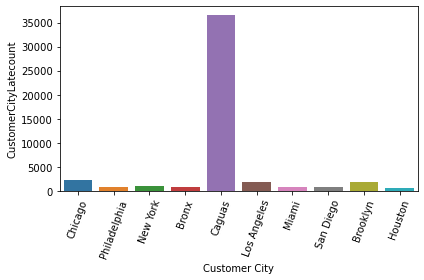

In [135]:
sns.barplot(x = CC1.index, y = CC1.CustomerCityLatecount)
plt.xticks(rotation=70)
plt.tight_layout()

## Customer Country

In [136]:
# Customer Country for late deliveries.
dataCustomerCountry= {'CustomerCountryLatecount':Late_Deliveries_Table.groupby('Customer Country').size(),
       'CustomerCountryLateMaincount':MainTable.groupby('Customer Country').size(),
      'Percentages':Late_Deliveries_Table.groupby('Customer Country').size()*100/MainTable.groupby('Customer Country').size()}

In [137]:
CustomerCountryLatecountPercetage=pd.DataFrame(dataCustomerCountry)
CC2=CustomerCountryLatecountPercetage.nlargest(10,'CustomerCountryLatecount').sort_values('Percentages',ascending=False)
CC2

,CustomerCountryLatecount,CustomerCountryLateMaincount,Percentages
Customer Country,,,
EE. UU.,60986,111146,54.870171
Puerto Rico,37991,69373,54.763381


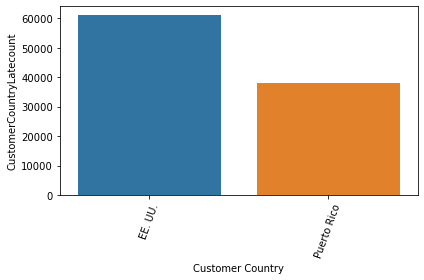

In [138]:
sns.barplot(x = CC2.index, y = CC2.CustomerCountryLatecount)
plt.xticks(rotation=70)
plt.tight_layout()

## Customer Segment

In [140]:
# Customer Segment for late deliveries.
dataCustomerSegment= {'CustomerSegmentLatecount':Late_Deliveries_Table.groupby('Customer Segment').size(),
       'CustomerSegmentLateMaincount':MainTable.groupby('Customer Segment').size(),
      'Percentages':Late_Deliveries_Table.groupby('Customer Segment').size()*100/MainTable.groupby('Customer Segment').size()}

In [141]:
CustomerSegmentLatecountPercetage=pd.DataFrame(dataCustomerSegment)
CS1=CustomerSegmentLatecountPercetage.nlargest(10,'CustomerSegmentLatecount').sort_values('Percentages',ascending=False)
CS1

,CustomerSegmentLatecount,CustomerSegmentLateMaincount,Percentages
Customer Segment,,,
Home Office,17747,32226,55.070440
Consumer,51248,93504,54.808350
Corporate,29982,54789,54.722663


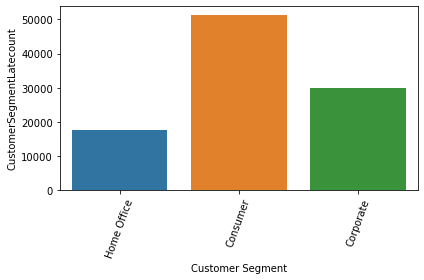

In [142]:
sns.barplot(x = CS1.index, y = CS1.CustomerSegmentLatecount)
plt.xticks(rotation=70)
plt.tight_layout()

In [31]:
#Customer Segment

## Customer State 

In [143]:
# Customer State for late deliveries.
dataCustomerState= {'CustomerStateLatecount':Late_Deliveries_Table.groupby('Customer State').size(),
       'CustomerStateLateMaincount':MainTable.groupby('Customer State').size(),
      'Percentages':Late_Deliveries_Table.groupby('Customer State').size()*100/MainTable.groupby('Customer State').size()}

In [144]:
CustomerStateLatecountPercetage=pd.DataFrame(dataCustomerState)
CS2=CustomerStateLatecountPercetage.nlargest(10,'CustomerStateLatecount').sort_values('Percentages',ascending=False)
CS2

,CustomerStateLatecount,CustomerStateLateMaincount,Percentages
Customer State,,,
IL,4303.0,7631,56.388416
CA,16180.0,29223,55.367348
OH,2262.0,4095,55.238095
TX,5028.0,9103,55.234538
PR,37991.0,69373,54.763381
FL,2942.0,5456,53.922287
NY,6107.0,11327,53.915423
PA,2049.0,3824,53.582636
MI,2036.0,3804,53.522608


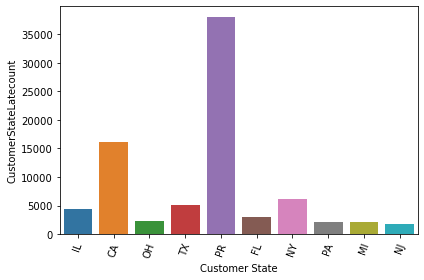

In [145]:
sns.barplot(x = CS2.index, y = CS2.CustomerStateLatecount)
plt.xticks(rotation=70)
plt.tight_layout()

## Department Name

In [146]:
# Department Name for late deliveries.
dataDepartmentName= {'DepartmentNameLatecount':Late_Deliveries_Table.groupby('Department Name').size(),
       'DepartmentNameLateMaincount':MainTable.groupby('Department Name').size(),
      'Percentages':Late_Deliveries_Table.groupby('Department Name').size()*100/MainTable.groupby('Department Name').size()}

In [147]:
DepartmentNameLatecountPercetage=pd.DataFrame(dataDepartmentName)
DN1=DepartmentNameLatecountPercetage.nlargest(10,'DepartmentNameLatecount').sort_values('Percentages',ascending=False)
DN1

,DepartmentNameLatecount,DepartmentNameLateMaincount,Percentages
Department Name,,,
Pet Shop,290,492,58.943089
Book Shop,229,405,56.543210
Fitness,1377,2479,55.546591
Outdoors,5375,9686,55.492463
Technology,806,1465,55.017065
Golf,18198,33220,54.780253
Fan Shop,36623,66861,54.774831
Apparel,26825,48998,54.747133
Footwear,7949,14525,54.726334


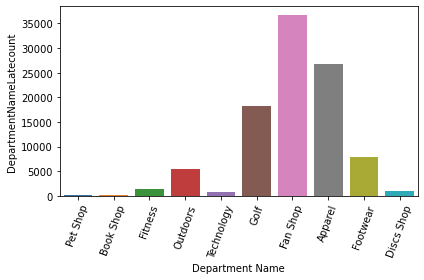

In [148]:
sns.barplot(x = DN1.index, y = DN1.DepartmentNameLatecount)
plt.xticks(rotation=70)
plt.tight_layout()

## Market

In [149]:
# Market for late deliveries.
dataMarket= {'MarketLatecount':Late_Deliveries_Table.groupby('Market').size(),
       'MarketLateMaincount':MainTable.groupby('Market').size(),
      'Percentages':Late_Deliveries_Table.groupby('Market').size()*100/MainTable.groupby('Market').size()}

In [150]:
MarketLatecountPercetage=pd.DataFrame(dataMarket)
M1=MarketLatecountPercetage.nlargest(10,'MarketLatecount').sort_values('Percentages',ascending=False)
M1

,MarketLatecount,MarketLateMaincount,Percentages
Market,,,
Europe,27743,50252,55.207753
Pacific Asia,22712,41260,55.046049
USCA,14138,25799,54.800574
Africa,6340,11614,54.589289
LATAM,28044,51594,54.355158


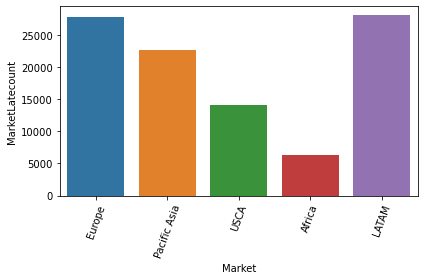

In [151]:
sns.barplot(x = M1.index, y = M1.MarketLatecount)
plt.xticks(rotation=70)
plt.tight_layout()

In [153]:
# Latin America-LATAM
# United States of Central America-USCA


## Order City

In [154]:
# Order City for late deliveries.
dataOrderCity= {'OrderCityLatecount':Late_Deliveries_Table.groupby('Order City').size(),
       'OrderCityLateMaincount':MainTable.groupby('Order City').size(),
      'Percentages':Late_Deliveries_Table.groupby('Order City').size()*100/MainTable.groupby('Order City').size()}

In [155]:
OrderCityLatecountPercetage=pd.DataFrame(dataOrderCity)
OC1=OrderCityLatecountPercetage.nlargest(10,'OrderCityLatecount').sort_values('Percentages',ascending=False)
OC1

,OrderCityLatecount,OrderCityLateMaincount,Percentages
Order City,,,
San Salvador,668.0,1135,58.854626
New York City,1261.0,2202,57.266122
London,672.0,1187,56.613311
Manila,766.0,1381,55.467053
Santo Domingo,1217.0,2211,55.042967
Managua,925.0,1682,54.994055
San Francisco,706.0,1297,54.433308
Mexico City,803.0,1484,54.110512
Tegucigalpa,942.0,1783,52.832305


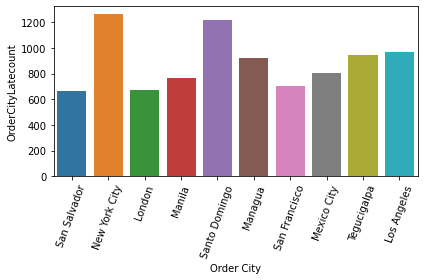

In [156]:
sns.barplot(x = OC1.index, y = OC1.OrderCityLatecount)
plt.xticks(rotation=70)
plt.tight_layout()

## Order Country

In [157]:
#Order Country for late deliveries.
dataOrderCountry= {'OrderCountryLatecount':Late_Deliveries_Table.groupby('Order Country').size(),
       'OrderCountryLateMaincount':MainTable.groupby('Order Country').size(),
      'Percentages':Late_Deliveries_Table.groupby('Order Country').size()*100/MainTable.groupby('Order Country').size()}

In [158]:
OrderCountryLatecountPercetage=pd.DataFrame(dataOrderCountry)
OC2=OrderCountryLatecountPercetage.nlargest(10,'OrderCountryLatecount').sort_values('Percentages',ascending=False)
OC2

,OrderCountryLatecount,OrderCountryLateMaincount,Percentages
Order Country,,,
Alemania,5383.0,9564,56.283982
India,2684.0,4783,56.115409
Francia,7341.0,13222,55.521101
Estados Unidos,13670.0,24840,55.032206
MÃ©xico,7246.0,13172,55.010629
Australia,4613.0,8497,54.289749
China,3123.0,5758,54.237582
Brasil,4331.0,7987,54.225617
Italia,2672.0,4989,53.557827


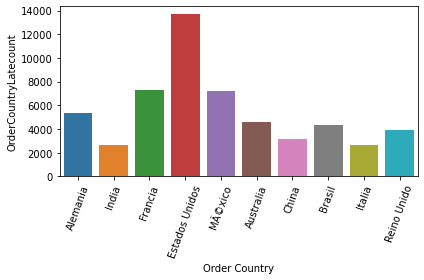

In [159]:
sns.barplot(x = OC2.index, y = OC2.OrderCountryLatecount)
plt.xticks(rotation=70)
plt.tight_layout()

## Order Region

In [160]:
# Order Region for late deliveries.
dataOrderRegion= {'OrderRegionLatecount':Late_Deliveries_Table.groupby('Order Region').size(),
       'OrderRegionLateMaincount':MainTable.groupby('Order Region').size(),
      'Percentages':Late_Deliveries_Table.groupby('Order Region').size()*100/MainTable.groupby('Order Region').size()}

In [161]:
OrderRegionLatecountPercetage=pd.DataFrame(dataOrderRegion)
OR1=OrderRegionLatecountPercetage.nlargest(10,'OrderRegionLatecount').sort_values('Percentages',ascending=False)
OR1

,OrderRegionLatecount,OrderRegionLateMaincount,Percentages
Order Region,,,
South Asia,4350,7731,56.266977
Western Europe,15140,27109,55.848611
Southeast Asia,5297,9539,55.529930
Central America,15518,28341,54.754596
Southern Europe,5129,9431,54.384477
South America,8111,14935,54.308671
Northern Europe,5292,9792,54.044118
Oceania,5482,10148,54.020497
West of USA,4313,7993,53.959715


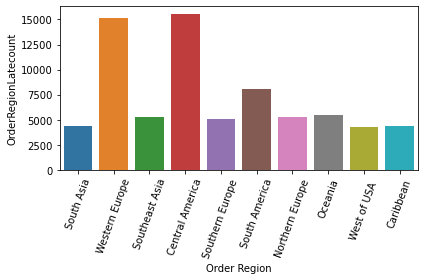

In [50]:
sns.barplot(x = OR1.index, y = OR1.OrderRegionLatecount)
plt.xticks(rotation=70)
plt.tight_layout()

## Order State

In [162]:
# Order State for late deliveries.
dataOrderState= {'OrderStateLatecount':Late_Deliveries_Table.groupby('Order State').size(),
       'OrderStateLateMaincount':MainTable.groupby('Order State').size(),
      'Percentages':Late_Deliveries_Table.groupby('Order State').size()*100/MainTable.groupby('Order State').size()}

In [163]:
OrderStateLatecountPercetage=pd.DataFrame(dataOrderState)
OS1=OrderStateLatecountPercetage.nlargest(10,'OrderStateLatecount').sort_values('Percentages',ascending=False)
OS1

,OrderStateLatecount,OrderStateLateMaincount,Percentages
Order State,,,
Nueva York,1594.0,2753,57.900472
Queensland,1249.0,2186,57.136322
Distrito Federal,1455.0,2559,56.858148
Texas,1386.0,2446,56.663941
San Salvador,1727.0,3055,56.530278
Isla de Francia,2588.0,4580,56.506550
Renania del Norte-Westfalia,1850.0,3303,56.009688
California,2670.0,4966,53.765606
Inglaterra,3612.0,6722,53.734008


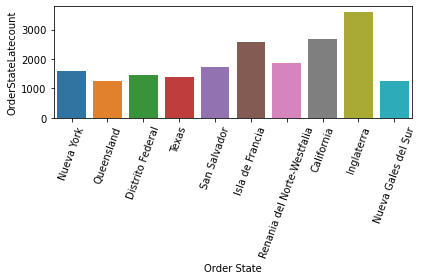

In [164]:
sns.barplot(x = OS1.index, y = OS1.OrderStateLatecount)
plt.xticks(rotation=70)
plt.tight_layout()

In [54]:
# England - Inglaterra
# New South Wales - Nueva Gales del Sur
# North Rhine-Westphalia - Renania del Norte-Westfalia

## Order Status

In [165]:
# Order Status for late deliveries.
dataOrderStatus= {'OrderStatusLatecount':Late_Deliveries_Table.groupby('Order Status').size(),
       'OrderStatusLateMaincount':MainTable.groupby('Order Status').size(),
      'Percentages':Late_Deliveries_Table.groupby('Order Status').size()*100/MainTable.groupby('Order Status').size()}

In [166]:
OrderStatusLatecountPercetage=pd.DataFrame(dataOrderStatus)
OS2=OrderStatusLatecountPercetage.nlargest(10,'OrderStatusLatecount').sort_values('Percentages',ascending=False)
OS2

,OrderStatusLatecount,OrderStatusLateMaincount,Percentages
Order Status,,,
PENDING,11712.0,20227,57.902803
PENDING_PAYMENT,22922.0,39832,57.546696
COMPLETE,34199.0,59491,57.486006
PAYMENT_REVIEW,1082.0,1893,57.157950
PROCESSING,12503.0,21902,57.086111
CLOSED,11109.0,19616,56.632341
ON_HOLD,5450.0,9804,55.589555


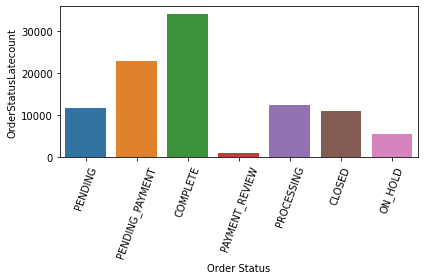

In [167]:
sns.barplot(x = OS2.index, y = OS2.OrderStatusLatecount)
plt.xticks(rotation=70)
plt.tight_layout()

## Product Name

In [168]:
# Product Name for late deliveries.
dataProductName= {'ProductNameLatecount':Late_Deliveries_Table.groupby('Product Name').size(),
       'ProductNameLateMaincount':MainTable.groupby('Product Name').size(),
      'Percentages':Late_Deliveries_Table.groupby('Product Name').size()*100/MainTable.groupby('Product Name').size()}

In [169]:
ProductNameLatecountPercetage=pd.DataFrame(dataProductName)
PN1=ProductNameLatecountPercetage.nlargest(10,'ProductNameLatecount').sort_values('Percentages',ascending=False)
PN1

,ProductNameLatecount,ProductNameLateMaincount,Percentages
Product Name,,,
Under Armour Girls' Toddler Spine Surge Runni,5865,10617,55.241594
Perfect Fitness Perfect Rip Deck,13473,24515,54.958189
Field & Stream Sportsman 16 Gun Fire Safe,9516,17325,54.926407
Pelican Sunstream 100 Kayak,8492,15500,54.787097
O'Brien Men's Neoprene Life Vest,10565,19298,54.746606
Nike Men's Dri-FIT Victory Golf Polo,11476,21035,54.556691
Diamondback Women's Serene Classic Comfort Bi,7487,13729,54.534198
Nike Men's CJ Elite 2 TD Football Cleat,12121,22246,54.486200
Nike Men's Free 5.0+ Running Shoe,6629,12169,54.474484


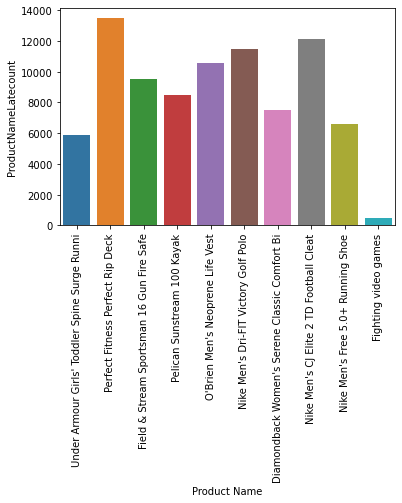

<Figure size 720x144 with 0 Axes>

In [170]:
sns.barplot(x = PN1.index, y = PN1.ProductNameLatecount)
#plt.legend(('Under Armour Girls Toddler Spine Surge Runni', 'Perfect Fitness Perfect Rip Deck'))
plt.xticks(rotation=90)
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(2)

plt.tight_layout()

## Shipping Mode

In [171]:
# Shipping Mode for late deliveries.
dataShippingMode= {'ShippingModeLatecount':Late_Deliveries_Table.groupby('Shipping Mode').size(),
       'ShippingModeLateMaincount':MainTable.groupby('Shipping Mode').size(),
      'Percentages':Late_Deliveries_Table.groupby('Shipping Mode').size()*100/MainTable.groupby('Shipping Mode').size()}

In [172]:
ShippingModeLatecountPercetage=pd.DataFrame(dataShippingMode)
SM1=ShippingModeLatecountPercetage.nlargest(10,'ShippingModeLatecount').sort_values('Percentages',ascending=False)
SM1

,ShippingModeLatecount,ShippingModeLateMaincount,Percentages
Shipping Mode,,,
First Class,26513,27814,95.322499
Second Class,26987,35216,76.632781
Same Day,4454,9737,45.743042
Standard Class,41023,107752,38.071683


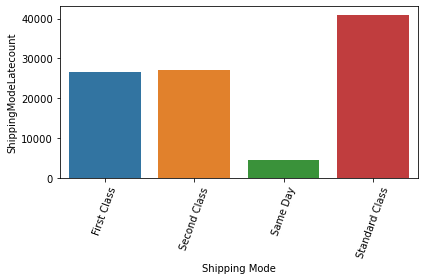

In [173]:
sns.barplot(x = SM1.index, y = SM1.ShippingModeLatecount)
plt.xticks(rotation=70)
plt.tight_layout()

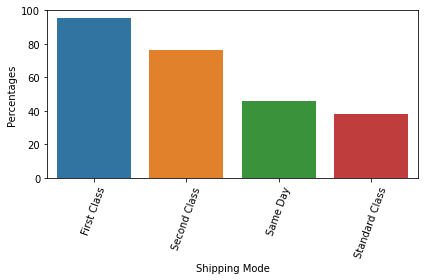

In [174]:
sns.barplot(x = SM1.index, y = SM1.Percentages)
plt.xticks(rotation=70)
plt.tight_layout()

In [65]:
# 95% of 1st class deliveries are late.

([<matplotlib.patches.Wedge at 0x7fb54d53aac0>,
 [Text(0.7329473144388031, 0.8202366940444366, 'First Class'),
  Text(-0.9066691132654292, 0.6228572220424844, 'Second Class'),
  Text(-1.014860620869934, -0.4243323228408273, 'Same Day'),
  Text(0.2920263800652886, -1.0605284500408105, 'Standard Class')],
 [Text(0.3997894442393471, 0.44740183311514714, '27%'),
  Text(-0.4945467890538704, 0.33974030293226415, '27%'),
  Text(-0.5535603386563276, -0.23145399427681485, '5%'),
  Text(0.15928711639924828, -0.5784700636586239, '41%')])

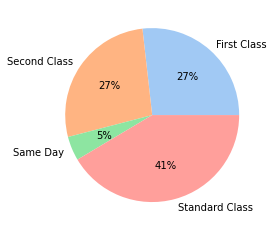

In [175]:
labels = ['First Class', 'Second Class', 'Same Day', 'Standard Class']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.pie(SM1.ShippingModeLatecount, labels = labels, colors = colors, autopct='%.0f%%')

([<matplotlib.patches.Wedge at 0x7fb56c501a90>,
 [Text(0.4283210967091617, 1.013183615202033, 'First Class'),
  Text(-1.089029613881431, -0.15496612561866951, 'Second Class'),
  Text(0.08097453197051206, -1.0970155537512478, 'Same Day'),
  Text(0.9819029301007416, -0.49584940844935826, 'Standard Class')],
 [Text(0.23362968911408816, 0.5526456082920179, '37%'),
  Text(-0.5940161530262351, -0.08452697761018337, '30%'),
  Text(0.04416792652937021, -0.5983721202279533, '18%'),
  Text(0.5355834164185862, -0.27046331369964993, '15%')])

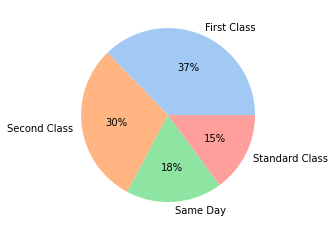

In [176]:
labels = ['First Class', 'Second Class', 'Same Day', 'Standard Class']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.pie(SM1.Percentages, labels = labels, colors = colors, autopct='%.0f%%')

In [177]:
# above pie chart show the contribution of late delivery percentage.

Type                                 4
Days for shipping (real)             7
Days for shipment (scheduled)        4
Benefit per order                14957
Sales per customer                2831
Delivery Status                      4
Late_delivery_risk                   2
Category Name                       50
Customer City                      563
Customer Country                     2
Customer Segment                     3
Customer State                      46
Department Name                     11
Market                               5
Order City                        3597
Order Country                      164
order date (DateOrders)          65752
Order Item Discount                927
Order Item Discount Rate            18
Order Item Product Price            69
Order Item Profit Ratio             84
Order Item Quantity                  5
Sales                              190
Order Item Total                  2831
Order Profit Per Order           14957
Order Region             

## late delivery trend year and month wise

In [178]:
Late_Deliveries_Table['order date (DateOrders)']=pd.to_datetime(Late_Deliveries_Table['order date (DateOrders)'])
Late_Deliveries_Table['order date (DateOrders)']

/var/folders/q1/98blz7rd14919ljz9jk87sjh0000gn/T/ipykernel_9447/2272286745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Late_Deliveries_Table['order date (DateOrders)']=pd.to_datetime(Late_Deliveries_Table['order date (DateOrders)'])


1        2018-01-13 12:27:00
6        2018-01-13 10:42:00
7        2018-01-13 10:21:00
8        2018-01-13 10:00:00
9        2018-01-13 09:39:00
                 ...        
180507   2016-01-16 09:16:00
180508   2016-01-16 07:10:00
180512   2016-01-16 06:07:00
180515   2016-01-16 01:34:00
180516   2016-01-15 21:00:00
Name: order date (DateOrders), Length: 98977, dtype: datetime64[ns]

In [179]:
Late_Deliveries_Table['Month']=Late_Deliveries_Table['order date (DateOrders)'].dt.strftime('%b')
Late_Deliveries_Table['Month']

/var/folders/q1/98blz7rd14919ljz9jk87sjh0000gn/T/ipykernel_9447/2100690180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Late_Deliveries_Table['Month']=Late_Deliveries_Table['order date (DateOrders)'].dt.strftime('%b')


1         Jan
6         Jan
7         Jan
8         Jan
9         Jan
         ... 
180507    Jan
180508    Jan
180512    Jan
180515    Jan
180516    Jan
Name: Month, Length: 98977, dtype: object

In [180]:
MainTable['order date (DateOrders)']=pd.to_datetime(Late_Deliveries_Table['order date (DateOrders)'])
MainTable['order date (DateOrders)']

0                        NaT
1        2018-01-13 12:27:00
2                        NaT
3                        NaT
4                        NaT
                 ...        
180514                   NaT
180515   2016-01-16 01:34:00
180516   2016-01-15 21:00:00
180517                   NaT
180518                   NaT
Name: order date (DateOrders), Length: 180519, dtype: datetime64[ns]

## Month

In [181]:
# Month for late deliveries.
dataMonth= Late_Deliveries_Table.groupby('Month').size()

In [182]:
dataMonth

Month
Apr    8378
Aug    8878
Dec    7063
Feb    7926
Jan    9827
Jul    8607
Jun    8300
Mar    8796
May    8745
Nov    6819
Oct    7073
Sep    8565
dtype: int64

In [183]:
#dataMonth.plot(kind = "bar")
sort_order=['Jan','Feb','Mar','Apr','May','Jun',
           'Jul','Aug','Sep','Oct','Nov','Dec']
dataMonth.index=pd.CategoricalIndex(dataMonth.index, categories=sort_order,ordered=True)

In [184]:
dataMonth.sort_index()

Month
Jan    9827
Feb    7926
Mar    8796
Apr    8378
May    8745
Jun    8300
Jul    8607
Aug    8878
Sep    8565
Oct    7073
Nov    6819
Dec    7063
dtype: int64

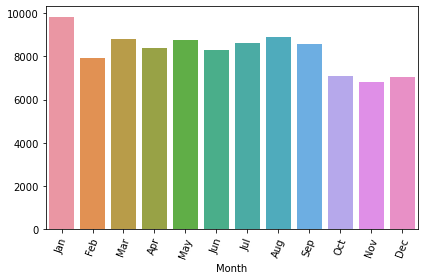

In [185]:
sns.barplot(x = dataMonth.index, y = dataMonth.values)
plt.xticks(rotation=70)
plt.tight_layout()
#x = dataMonth.Month, y = dataMonth.values

In [187]:
#Late_Deliveries_Table['Month'].hist(by=Late_Deliveries_Table['Month'])


# Data preparetion for Modeling

In [189]:
train = MainTable

Type                                 4
Days for shipping (real)             7
Days for shipment (scheduled)        4
Benefit per order                14957
Sales per customer                2831
Delivery Status                      4
Late_delivery_risk                   2
Category Name                       50
Customer City                      563
Customer Country                     2
Customer Segment                     3
Customer State                      46
Department Name                     11
Market                               5
Order City                        3597
Order Country                      164
order date (DateOrders)          36048
Order Item Discount                927
Order Item Discount Rate            18
Order Item Product Price            69
Order Item Profit Ratio             84
Order Item Quantity                  5
Sales                              190
Order Item Total                  2831
Order Profit Per Order           14957
Order Region             

In [191]:
# 1 represent delivery will be late. 0 suggest not.
train["Delivery Status"] = np.where(train["Delivery Status"] == "Late delivery", 1, 0)

In [192]:
train['Delivery Status']

0         0
1         1
2         0
3         0
4         0
         ..
180514    0
180515    1
180516    1
180517    0
180518    0
Name: Delivery Status, Length: 180519, dtype: int64

In [194]:
#creating dummies for the catagorical variables
#pd.get_dummies(train, dummy_na=True)

In [195]:
train = train.drop(['order date (DateOrders)','shipping date (DateOrders)'],axis=1)

In [196]:
cat_col=train.select_dtypes(exclude = 'number')

In [84]:
#pd.get_dummies(train, dummy_na=True)

In [197]:
cat_col.nunique()

Type                   4
Category Name         50
Customer City        563
Customer Country       2
Customer Segment       3
Customer State        46
Department Name       11
Market                 5
Order City          3597
Order Country        164
Order Region          23
Order State         1089
Order Status           9
Product Name         118
Shipping Mode          4
dtype: int64

In [86]:
#pip install category_encoders

In [87]:
#import category_encoders as ce

In [88]:
#ce.WOEEncoder(cols=['Category Name','Customer City','Customer State','Department Name','Order City','Order Country','Order Region','Order State','Product Name'])

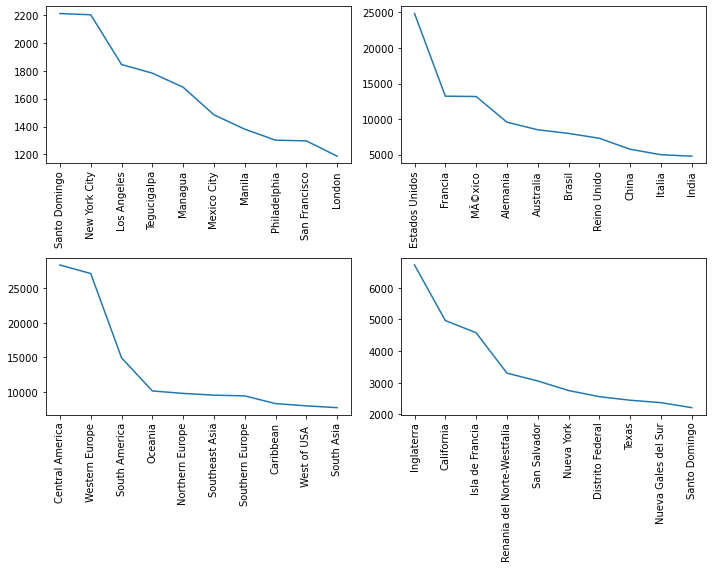

In [198]:
#fig, ax = plt.subplots(2,2)
plt.figure(figsize=(10, 8))
#plt.subplots(figsize=(10,8))

plt.subplot(221)
plt.plot(MainTable['Order City'].value_counts().nlargest(10))
plt.xticks(rotation=90)
plt.tight_layout()

plt.subplot(222)
plt.plot(MainTable['Order Country'].value_counts().nlargest(10))
plt.xticks(rotation=90)
plt.tight_layout()

plt.subplot(223)
plt.plot(MainTable['Order Region'].value_counts().nlargest(10))
plt.xticks(rotation=90)
plt.tight_layout()

plt.subplot(224)
plt.plot(MainTable['Order State'].value_counts().nlargest(10))
plt.xticks(rotation=90)
plt.tight_layout()

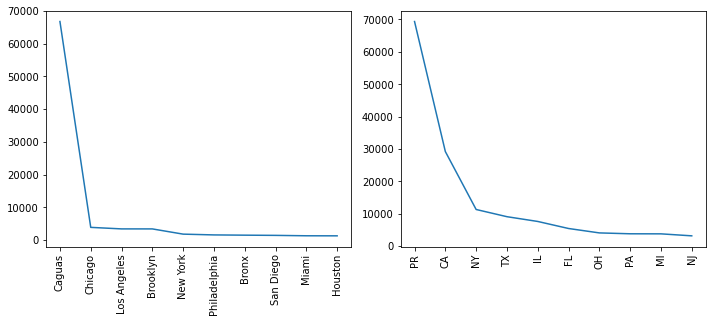

In [199]:
#fig, ax = plt.subplots(2,2)
plt.figure(figsize=(10, 8))
#plt.subplots(figsize=(10,8))

plt.subplot(221)
plt.plot(MainTable['Customer City'].value_counts().nlargest(10))
plt.xticks(rotation=90)
plt.tight_layout()

plt.subplot(222)
plt.plot(MainTable['Customer State'].value_counts().nlargest(10))
plt.xticks(rotation=90)
plt.tight_layout()


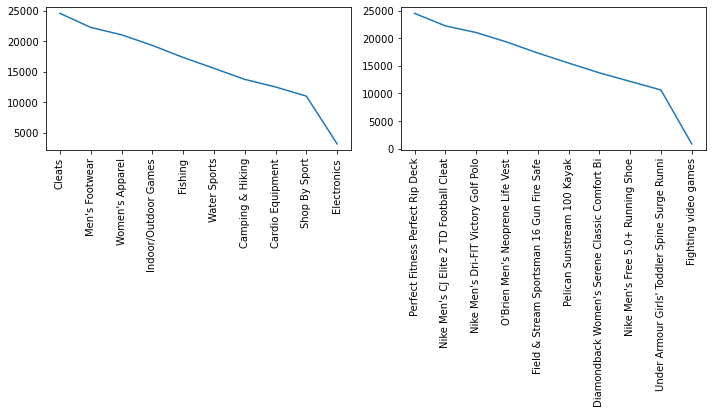

In [91]:
#fig, ax = plt.subplots(2,2)
plt.figure(figsize=(10, 8))
#plt.subplots(figsize=(10,8))

plt.subplot(221)
plt.plot(MainTable['Category Name'].value_counts().nlargest(10))
plt.xticks(rotation=90)
plt.tight_layout()

plt.subplot(222)
plt.plot(MainTable['Product Name'].value_counts().nlargest(10))
plt.xticks(rotation=90)
plt.tight_layout()

### Cardinality reduction function

In [200]:
from collections import Counter
def cumulatively_categorise(column,threshold,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append('Other')

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 'Other')

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column



In [201]:
#Call the function with a threshold of 40%
transformed_Customer_City,new_Customer_City=cumulatively_categorise(MainTable['Customer City'],.4,return_categories_list=True)
new_Customer_City

['Caguas', 'Chicago', 'Los Angeles', 'Other']

In [202]:
#Call the function with a threshold of 82%
transformed_Category_Name,new_Category_Name=cumulatively_categorise(MainTable['Category Name'],.82,return_categories_list=True)
new_Category_Name

['Cleats',
 "Men's Footwear",
 "Women's Apparel",
 'Indoor/Outdoor Games',
 'Fishing',
 'Water Sports',
 'Camping & Hiking',
 'Cardio Equipment',
 'Shop By Sport',
 'Other']

In [203]:
#Call the function with a threshold of 82%
transformed_Product_Name,new_Product_Name=cumulatively_categorise(MainTable['Product Name'],.82,return_categories_list=True)
new_Product_Name

['Perfect Fitness Perfect Rip Deck',
 "Nike Men's CJ Elite 2 TD Football Cleat",
 "Nike Men's Dri-FIT Victory Golf Polo",
 "O'Brien Men's Neoprene Life Vest",
 'Field & Stream Sportsman 16 Gun Fire Safe',
 'Pelican Sunstream 100 Kayak',
 "Diamondback Women's Serene Classic Comfort Bi",
 "Nike Men's Free 5.0+ Running Shoe",
 "Under Armour Girls' Toddler Spine Surge Runni",
 'Other']

In [204]:
#Call the function with a threshold of 75%
transformed_Customer_State,new_Customer_State=cumulatively_categorise(MainTable['Customer State'],.75,return_categories_list=True)
new_Customer_State

['PR', 'CA', 'NY', 'TX', 'IL', 'FL', 'OH', 'Other']

In [205]:
#Call the function with a threshold of 55%
transformed_Order_Country,new_Order_Country=cumulatively_categorise(MainTable['Order Country'],.55,return_categories_list=True)
new_Order_Country

['Estados Unidos',
 'Francia',
 'MÃ©xico',
 'Alemania',
 'Australia',
 'Brasil',
 'Reino Unido',
 'China',
 'Italia',
 'India',
 'Other']

In [206]:
#Call the function with a threshold of 75%
transformed_Order_Region,new_Order_Region=cumulatively_categorise(MainTable['Order Region'],.75,return_categories_list=True)
new_Order_Region

['Central America',
 'Western Europe',
 'South America',
 'Oceania',
 'Northern Europe',
 'Southeast Asia',
 'Southern Europe',
 'Caribbean',
 'West of USA ',
 'South Asia',
 'Eastern Asia',
 'Other']

In [208]:
# droped columns

Type                                 4
Days for shipping (real)             7
Days for shipment (scheduled)        4
Benefit per order                14957
Sales per customer                2831
Delivery Status                      2
Late_delivery_risk                   2
Category Name                       50
Customer City                      563
Customer Country                     2
Customer Segment                     3
Customer State                      46
Department Name                     11
Market                               5
Order City                        3597
Order Country                      164
order date (DateOrders)          36048
Order Item Discount                927
Order Item Discount Rate            18
Order Item Product Price            69
Order Item Profit Ratio             84
Order Item Quantity                  5
Sales                              190
Order Item Total                  2831
Order Profit Per Order           14957
Order Region             

In [209]:
MainTable.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Name', 'Product Price',
       'Product Status', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [210]:
MainTable['Order Region']=transformed_Order_Region
MainTable['Order Country']=transformed_Order_Country
MainTable['Customer State']=transformed_Customer_State
MainTable['Product Name']=transformed_Product_Name
MainTable['Category Name']=transformed_Category_Name
MainTable['Customer City']=transformed_Customer_City
MainTable=MainTable.drop(columns=['Order City','Order State'],axis=1)

In [211]:
MainTable.to_csv('CleanedDatawithreducedcardinality.csv',index=False)

### using cleaned data

In [212]:
train = MainTable

In [213]:
train

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Sales,Order Item Total,Order Profit Per Order,Order Region,Order Status,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,0,0,Other,Caguas,Puerto Rico,...,327.750000,314.640015,91.250000,Southeast Asia,COMPLETE,Other,327.750000,0,02/03/18 22:56,Standard Class
1,TRANSFER,5,4,-79.700005,311.359985,1,1,Other,Caguas,Puerto Rico,...,327.750000,311.359985,-79.700005,South Asia,PENDING,Other,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-79.700005,309.720001,0,0,Other,Other,EE. UU.,...,327.750000,309.720001,-79.700005,South Asia,CLOSED,Other,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,0,0,Other,Los Angeles,EE. UU.,...,327.750000,304.809998,22.860001,Oceania,COMPLETE,Other,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,0,0,Other,Caguas,Puerto Rico,...,327.750000,298.250000,134.210007,Oceania,PENDING_PAYMENT,Other,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,0,0,Fishing,Other,EE. UU.,...,399.980011,399.980011,40.000000,Eastern Asia,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-79.700005,395.980011,1,1,Fishing,Other,EE. UU.,...,399.980011,395.980011,-79.700005,Eastern Asia,COMPLETE,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,1,1,Fishing,Other,EE. UU.,...,399.980011,391.980011,141.110001,Oceania,PENDING,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,151.500008,387.980011,0,0,Fishing,Caguas,Puerto Rico,...,399.980011,387.980011,151.500008,Oceania,PENDING_PAYMENT,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [214]:
train = train.drop(['order date (DateOrders)','shipping date (DateOrders)'],axis=1)

In [215]:
train

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order Status,Product Name,Product Price,Product Status,Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,0,0,Other,Caguas,Puerto Rico,...,1,327.750000,314.640015,91.250000,Southeast Asia,COMPLETE,Other,327.750000,0,Standard Class
1,TRANSFER,5,4,-79.700005,311.359985,1,1,Other,Caguas,Puerto Rico,...,1,327.750000,311.359985,-79.700005,South Asia,PENDING,Other,327.750000,0,Standard Class
2,CASH,4,4,-79.700005,309.720001,0,0,Other,Other,EE. UU.,...,1,327.750000,309.720001,-79.700005,South Asia,CLOSED,Other,327.750000,0,Standard Class
3,DEBIT,3,4,22.860001,304.809998,0,0,Other,Los Angeles,EE. UU.,...,1,327.750000,304.809998,22.860001,Oceania,COMPLETE,Other,327.750000,0,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,0,0,Other,Caguas,Puerto Rico,...,1,327.750000,298.250000,134.210007,Oceania,PENDING_PAYMENT,Other,327.750000,0,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,0,0,Fishing,Other,EE. UU.,...,1,399.980011,399.980011,40.000000,Eastern Asia,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,Standard Class
180515,DEBIT,3,2,-79.700005,395.980011,1,1,Fishing,Other,EE. UU.,...,1,399.980011,395.980011,-79.700005,Eastern Asia,COMPLETE,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,1,1,Fishing,Other,EE. UU.,...,1,399.980011,391.980011,141.110001,Oceania,PENDING,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,Standard Class
180517,PAYMENT,3,4,151.500008,387.980011,0,0,Fishing,Caguas,Puerto Rico,...,1,399.980011,387.980011,151.500008,Oceania,PENDING_PAYMENT,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,Standard Class


In [216]:
#creating dummies for the catagorical variables
df=pd.get_dummies(train, dummy_na=True)

In [217]:
df

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,...,Product Name_Other,Product Name_Pelican Sunstream 100 Kayak,Product Name_Perfect Fitness Perfect Rip Deck,Product Name_Under Armour Girls' Toddler Spine Surge Runni,Product Name_nan,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class,Shipping Mode_nan
0,3,4,91.250000,314.640015,0,0,13.110000,0.04,327.750000,0.29,...,1,0,0,0,0,0,0,0,1,0
1,5,4,-79.700005,311.359985,1,1,16.389999,0.05,327.750000,-0.34,...,1,0,0,0,0,0,0,0,1,0
2,4,4,-79.700005,309.720001,0,0,18.030001,0.06,327.750000,-0.34,...,1,0,0,0,0,0,0,0,1,0
3,3,4,22.860001,304.809998,0,0,22.940001,0.07,327.750000,0.08,...,1,0,0,0,0,0,0,0,1,0
4,2,4,134.210007,298.250000,0,0,29.500000,0.09,327.750000,0.45,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,40.000000,399.980011,0,0,0.000000,0.00,399.980011,0.10,...,0,0,0,0,0,0,0,0,1,0
180515,3,2,-79.700005,395.980011,1,1,4.000000,0.01,399.980011,-0.34,...,0,0,0,0,0,0,0,1,0,0
180516,5,4,141.110001,391.980011,1,1,8.000000,0.02,399.980011,0.36,...,0,0,0,0,0,0,0,0,1,0
180517,3,4,151.500008,387.980011,0,0,12.000000,0.03,399.980011,0.48,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X = df.drop(["Delivery Status","Late_delivery_risk"],axis=1)

In [ ]:
y = df["Delivery Status"]

In [ ]:
y.nunique()

In [ ]:
# Remove high coorealation features

In [237]:
corr_matrix= X.corr().abs()

In [238]:
print(corr_matrix)

                               Days for shipping (real)  \
Days for shipping (real)                       1.000000   
Days for shipment (scheduled)                  0.515880   
Benefit per order                              0.002265   
Sales per customer                             0.000422   
Order Item Discount                            0.001731   
...                                                 ...   
Shipping Mode_First Class                      0.393646   
Shipping Mode_Same Day                         0.444016   
Shipping Mode_Second Class                     0.149528   
Shipping Mode_Standard Class                   0.373409   
Shipping Mode_nan                                   NaN   

                               Days for shipment (scheduled)  \
Days for shipping (real)                            0.515880   
Days for shipment (scheduled)                       1.000000   
Benefit per order                                   0.001087   
Sales per customer                 

In [239]:
upper_tri=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

/var/folders/q1/98blz7rd14919ljz9jk87sjh0000gn/T/ipykernel_9447/619481807.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


In [241]:
to_drop=[column for column in upper_tri.columns if any(upper_tri[column]>0.95)]

In [242]:
print(to_drop)

['Sales', 'Order Item Total', 'Order Profit Per Order', 'Product Price', 'Customer Country_EE. UU.', 'Customer Country_Puerto Rico', 'Customer State_PR', 'Order Country_Estados Unidos', 'Order Status_CLOSED', 'Order Status_PENDING_PAYMENT', "Product Name_Diamondback Women's Serene Classic Comfort Bi", 'Product Name_Field & Stream Sportsman 16 Gun Fire Safe', "Product Name_Nike Men's CJ Elite 2 TD Football Cleat", "Product Name_Nike Men's Dri-FIT Victory Golf Polo", "Product Name_Nike Men's Free 5.0+ Running Shoe", "Product Name_O'Brien Men's Neoprene Life Vest", 'Product Name_Other', 'Product Name_Pelican Sunstream 100 Kayak', 'Product Name_Perfect Fitness Perfect Rip Deck', "Product Name_Under Armour Girls' Toddler Spine Surge Runni"]


In [243]:
X = df.drop(['Sales', 'Order Item Total', 'Order Profit Per Order', 'Product Price', 'Customer Country_EE. UU.', 'Customer Country_Puerto Rico', 'Customer State_PR', 'Order Country_Estados Unidos', 'Order Status_CLOSED', 'Order Status_PENDING_PAYMENT', "Product Name_Diamondback Women's Serene Classic Comfort Bi", 'Product Name_Field & Stream Sportsman 16 Gun Fire Safe', "Product Name_Nike Men's CJ Elite 2 TD Football Cleat", "Product Name_Nike Men's Dri-FIT Victory Golf Polo", "Product Name_Nike Men's Free 5.0+ Running Shoe", "Product Name_O'Brien Men's Neoprene Life Vest", 'Product Name_Other', 'Product Name_Pelican Sunstream 100 Kayak', 'Product Name_Perfect Fitness Perfect Rip Deck', "Product Name_Under Armour Girls' Toddler Spine Surge Runni"],axis=1)

In [245]:
print(X.columns)

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio',
       ...
       'Order Status_PENDING', 'Order Status_PROCESSING',
       'Order Status_SUSPECTED_FRAUD', 'Order Status_nan', 'Product Name_nan',
       'Shipping Mode_First Class', 'Shipping Mode_Same Day',
       'Shipping Mode_Second Class', 'Shipping Mode_Standard Class',
       'Shipping Mode_nan'],
      dtype='object', length=102)


In [226]:
# coorealtion with respect to target variables

In [246]:
df1=X
df1["Delivery Status"]=y

In [248]:
TagetVarCoOrealtion=df1.corrwith(df1["Delivery Status"]).abs()

In [261]:
TagetVarCoOrealtion[TagetVarCoOrealtion>.9]

Delivery Status       1.0
Late_delivery_risk    1.0
dtype: float64

In [265]:
X=df1.drop(["Delivery Status","Late_delivery_risk"],axis=1)

In [266]:
y = df1["Delivery Status"]

In [ ]:
# No higher corelation were found.

In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/ghostpc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [268]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [282]:
importance = abs(logreg.coef_[0])

Feature: 0, Score: 7.40545
Feature: 1, Score: 7.16563
Feature: 2, Score: 0.00398
Feature: 3, Score: 0.00449
Feature: 4, Score: 0.00990
Feature: 5, Score: 0.13976
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.25901
Feature: 8, Score: 0.23075
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.45737
Feature: 11, Score: 0.96627
Feature: 12, Score: 0.86660
Feature: 13, Score: 3.64726
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.06867
Feature: 16, Score: 0.50220
Feature: 17, Score: 0.21963
Feature: 18, Score: 0.43478
Feature: 19, Score: 0.22292
Feature: 20, Score: 0.46187
Feature: 21, Score: 0.08276
Feature: 22, Score: 0.00375
Feature: 23, Score: 0.25613
Feature: 24, Score: 0.11121
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.91763
Feature: 27, Score: 0.02333
Feature: 28, Score: 0.05620
Feature: 29, Score: 0.35987
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.43397
Feature: 33, Score: 0.50105
Feature: 34, Score: 0.42201
Feature: 35, Score: 0.00000
Fe

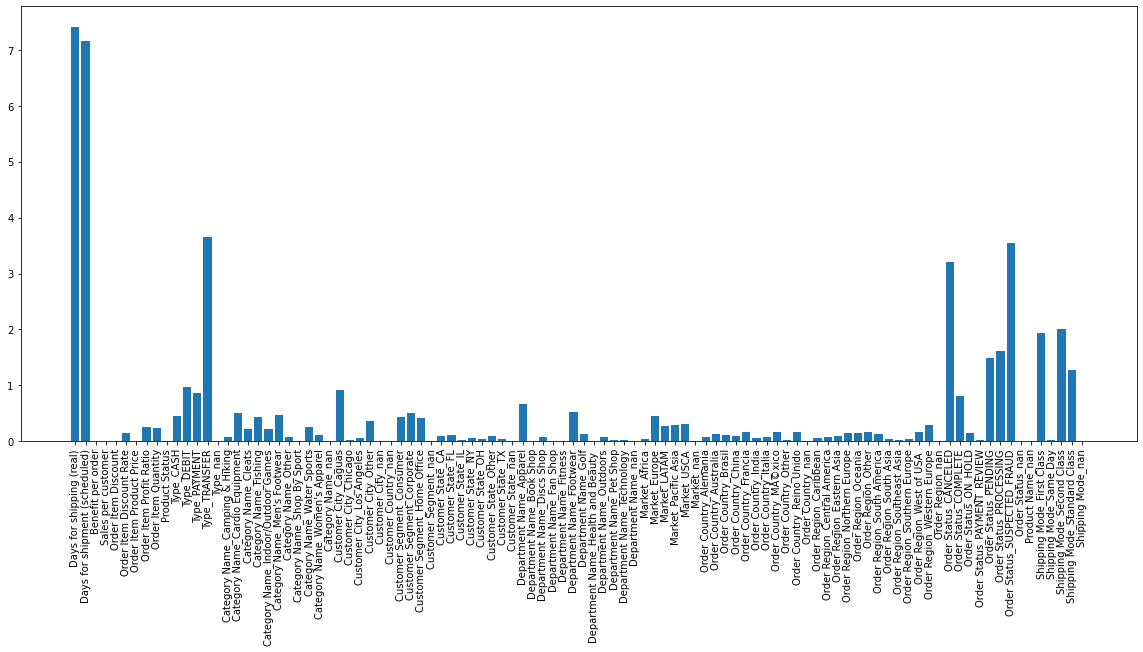

In [292]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(20, 8))
plt.bar([x for x in X.columns], importance)
#plt.bar([x for x in importance.], X.columns)
plt.xticks(rotation=90)
plt.show()

In [284]:
X.columns

'Days for shipment (scheduled)'

In [303]:
df_featureImp=pd.DataFrame(list(zip(X.columns, importance)),columns=['Names','importance'])

In [313]:
df_featureImp[df_featureImp['importance']>.5].sort_values(by=['importance'],ascending=False)

,Names,importance
0,Days for shipping (real),7.405455
1,Days for shipment (scheduled),7.165629
13,Type_TRANSFER,3.647264
92,Order Status_SUSPECTED_FRAUD,3.550177
86,Order Status_CANCELED,3.209753
97,Shipping Mode_Second Class,2.011768
95,Shipping Mode_First Class,1.943258
91,Order Status_PROCESSING,1.619806
90,Order Status_PENDING,1.492860
98,Shipping Mode_Standard Class,1.271338


### Reducing overfitting of the data

In [315]:
df_TopfeatureImp=df_featureImp[df_featureImp['importance']>.5].sort_values(by=['importance'],ascending=False)

In [316]:
df_TopfeatureImp.Names

0           Days for shipping (real)
1      Days for shipment (scheduled)
13                     Type_TRANSFER
92      Order Status_SUSPECTED_FRAUD
86             Order Status_CANCELED
97        Shipping Mode_Second Class
95         Shipping Mode_First Class
91           Order Status_PROCESSING
90              Order Status_PENDING
98      Shipping Mode_Standard Class
11                        Type_DEBIT
26              Customer City_Caguas
12                      Type_PAYMENT
87             Order Status_COMPLETE
44           Department Name_Apparel
49          Department Name_Footwear
16    Category Name_Cardio Equipment
33        Customer Segment_Corporate
Name: Names, dtype: object

In [319]:
X1 = X[df_TopfeatureImp.Names]

In [320]:
y1 = y

,Days for shipping (real),Days for shipment (scheduled),Type_TRANSFER,Order Status_SUSPECTED_FRAUD,Order Status_CANCELED,Shipping Mode_Second Class,Shipping Mode_First Class,Order Status_PROCESSING,Order Status_PENDING,Shipping Mode_Standard Class,Type_DEBIT,Customer City_Caguas,Type_PAYMENT,Order Status_COMPLETE,Department Name_Apparel,Department Name_Footwear,Category Name_Cardio Equipment,Customer Segment_Corporate
0,3,4,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0
1,5,4,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0
2,4,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,4,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
4,2,4,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
180515,3,2,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
180516,5,4,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
180517,3,4,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0


In [363]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.4, random_state=0)
#adding regularization term for overfitting model
logreg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=50)
logreg.fit(X_train, y_train)

/Users/ghostpc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=50)

In [365]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [366]:
X_train.columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Type_TRANSFER', 'Order Status_SUSPECTED_FRAUD',
       'Order Status_CANCELED', 'Shipping Mode_Second Class',
       'Shipping Mode_First Class', 'Order Status_PROCESSING',
       'Order Status_PENDING', 'Shipping Mode_Standard Class', 'Type_DEBIT',
       'Customer City_Caguas', 'Type_PAYMENT', 'Order Status_COMPLETE',
       'Department Name_Apparel', 'Department Name_Footwear',
       'Category Name_Cardio Equipment', 'Customer Segment_Corporate'],
      dtype='object')

In [367]:
X_train

,Days for shipping (real),Days for shipment (scheduled),Type_TRANSFER,Order Status_SUSPECTED_FRAUD,Order Status_CANCELED,Shipping Mode_Second Class,Shipping Mode_First Class,Order Status_PROCESSING,Order Status_PENDING,Shipping Mode_Standard Class,Type_DEBIT,Customer City_Caguas,Type_PAYMENT,Order Status_COMPLETE,Department Name_Apparel,Department Name_Footwear,Category Name_Cardio Equipment,Customer Segment_Corporate
24470,5,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
51050,3,4,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
129044,2,4,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
74171,5,4,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
21471,6,4,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152315,6,4,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0
176963,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
117952,2,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
173685,6,4,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0


In [385]:
# remove this feature as it causes overfit in the resulting model.
X2 = X1.drop(['Days for shipping (real)'],axis=1)
y2=y1

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.4, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/ghostpc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [387]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71


In [388]:
# ploting confusion matrix

In [390]:
from sklearn.metrics import classification_report, confusion_matrix

In [391]:
cm = confusion_matrix(y_test, logreg.predict(X_test))

In [392]:
cm

array([[30007,  2711],
       [18148, 21342]])

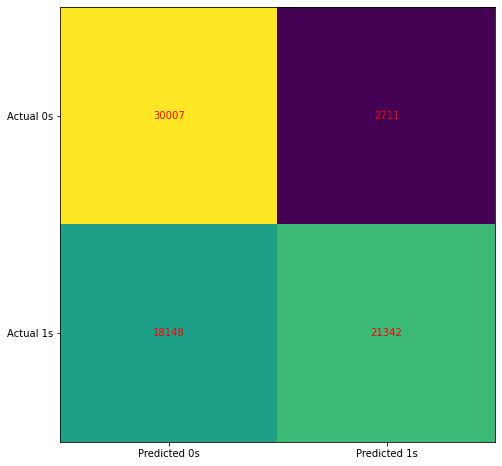

In [393]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

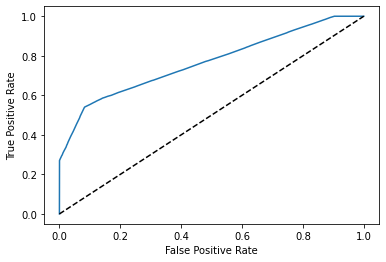

In [396]:
#define metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color="black",linestyle="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [397]:
importance = abs(logreg.coef_[0])

Feature: 0, Score: 0.38388
Feature: 1, Score: 4.24214
Feature: 2, Score: 6.50728
Feature: 3, Score: 6.38169
Feature: 4, Score: 0.69705
Feature: 5, Score: 6.41725
Feature: 6, Score: 4.30966
Feature: 7, Score: 4.33717
Feature: 8, Score: 1.85687
Feature: 9, Score: 0.01113
Feature: 10, Score: 0.00426
Feature: 11, Score: 0.05177
Feature: 12, Score: 0.07067
Feature: 13, Score: 0.01513
Feature: 14, Score: 0.09282
Feature: 15, Score: 0.10403
Feature: 16, Score: 0.01505


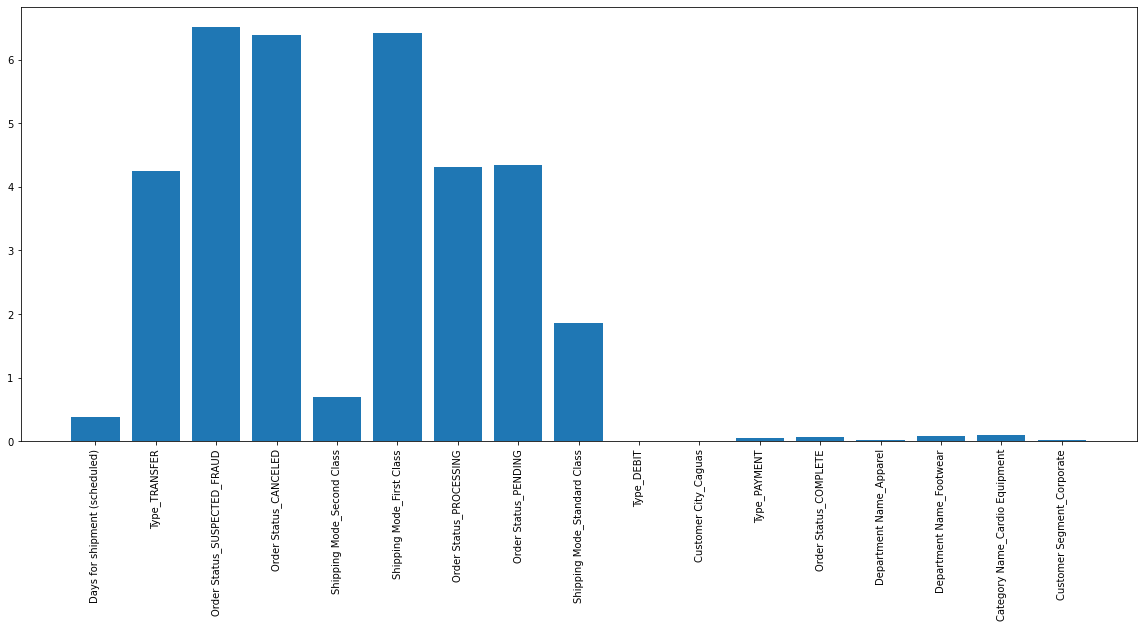

In [407]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(20, 8))
plt.bar([x for x in X2.columns], importance)
plt.xticks(rotation=90)
plt.show()